In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from IPython.html.widgets import interact
#import seaborn as sns
%matplotlib inline
#%matplotlib notebook

/scratch/scratch/xiaodong/opt/anaconda3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
minup = 0 # minimum z of up leaflet
maxup = 35 # maximum z of up leaflet
minlow = -35 # minimum z of low leaflet 
maxlow = 0 # maximum z of low leaflet
level = 15 # number of level in contour
nc = 10 # number of level in contour
ngrid = 100 # number of grid in x/y direction for interpolate
tmsize = 1000 # size to represent the M2TM
figsize_x = 4.5
figsize_y = 4.5

vup = np.linspace(minup, maxup, level, endpoint=True) # contour levels for up leaflet
vlow = np.linspace(minlow, maxlow, level, endpoint=True) # contour levels for low leaflet

In [3]:
def Read_XYZ(datefile):
    data = pd.read_csv(datefile, sep='\t')
    x = data['X']
    y = data['Y']
    z = data['Z']
    return x, y, z

In [4]:
def inerplate_xyz(x, y, z):
    # Set up a regular grid of interpolation points
    xi, yi = np.linspace(x.min(), x.max(), ngrid), np.linspace(y.min(), y.max(), ngrid)
    xi, yi = np.meshgrid(xi, yi)
    nlevels = np.linspace(z.min(), z.max(), nc)
    # Interpolate
    rbf = scipy.interpolate.Rbf(x, y, z, function='cubic')
    zi = rbf(xi, yi)
    return xi, yi, zi

In [5]:
def create_subplot_up(frame, axi=None, savefig=False):
    if axi is None:
        axi = plt.gca()
    t = frame/100
    # Read M2
    M2file = 'DAT/M2xyzf%d.dat' %frame
    xm2, ym2, zm2 = Read_XYZ(M2file)
    # Read up leaflet
    datafile = 'DAT/upxyzf%d.dat' %frame
    x, y, z = Read_XYZ(datafile)
    xi, yi, zi = inerplate_xyz(x, y, z)
    cax = axi.contourf(xi, yi, zi, levels=vup, cmap=plt.cm.jet)
    #cax0 = ax[0].contourf(xi, yi, zi, levels=nlevels, cmap=plt.cm.jet)
    axi.set_ylabel('Y ($\AA$)')
    axi.set_xlabel('X ($\AA$)')
    axi.set_title('up leaflet %d $\mu$s' %t)
    axi.set_xlim(0, None)
    axi.set_ylim(0, None)
    axi.set_aspect('equal')
    plt.colorbar(cax, ax=axi)
    axi.scatter(xm2, ym2, s=tmsize, marker='o', facecolors='none', edgecolors='k')
    if savefig:
        figs = plt.gcf()
        figs.set_size_inches(figsize_x, figsize_y)
        figs.savefig('PNG/f%d_up.png' %frame, dpi=300)
        plt.close()

In [6]:
def create_subplot_low(frame, axi=None, savefig=False):
    if axi is None:
        axi = plt.gca()
    t = frame/100   
    # Read M2
    M2file = 'DAT/M2xyzf%d.dat' %frame
    xm2, ym2, zm2 = Read_XYZ(M2file)
    # Read low leaflet
    datafile = 'DAT/lowxyzf%d.dat' %frame
    x, y, z = Read_XYZ(datafile)
    xi, yi, zi = inerplate_xyz(x, y, z)
    cax = axi.contourf(xi, yi, zi, levels=vlow, cmap=plt.cm.jet)
    #cax0 = ax[0].contourf(xi, yi, zi, levels=nlevels, cmap=plt.cm.jet)
    axi.set_ylabel('Y ($\AA$)')
    axi.set_xlabel('X ($\AA$)')
    axi.set_title('low leaflet %d $\mu$s' %t)
    axi.set_xlim(0, None)
    axi.set_ylim(0, None)
    axi.set_aspect('equal')
    plt.colorbar(cax, ax=axi)
    axi.scatter(xm2, ym2, s=tmsize, marker='o', facecolors='none', edgecolors='k')
    if savefig:
        figs = plt.gcf()
        figs.set_size_inches(figsize_x, figsize_y)
        figs.savefig('PNG/f%d_low.png' %frame, dpi=300)
        plt.close()

In [7]:
def create_subplot_head(frame, axi=None, savefig=False):
    if axi is None:
        #axi = plt.gca()
        fig = plt.figure()
        axi = fig.add_subplot(111, projection='3d')
    t = frame/100
    datafile = 'DAT/upxyzf%d.dat' %frame
    x_up, y_up, z_up = Read_XYZ(datafile)
    datafile = 'DAT/lowxyzf%d.dat' %frame
    x_low, y_low, z_low = Read_XYZ(datafile)
    axi.scatter(x_up, y_up, z_up, marker='o', facecolors='b', edgecolors='b')
    axi.scatter(x_low, y_low, z_low, marker='o', facecolors='r', edgecolors='r')
    axi.set_xlabel('X axis')
    axi.set_ylabel('Y axis')
    axi.set_zlabel('Z axis')
    axi.view_init(5, 45)
    plt.draw()
    if savefig:
        figs = plt.gcf()
        figs.set_size_inches(figsize_x, figsize_y)
        figs.savefig('PNG/f%d_head.png' %frame, dpi=300)
        plt.close()

In [8]:
def create_subplot_head_sub(frame, axi=None, savefig=False):
    if axi is None:
        #axi = plt.gca()
        fig = plt.figure()
        axi = fig.add_subplot(111, projection='3d')
    t = frame/100
    datafile = 'DAT/upxyzf%d.dat' %frame
    x_up, y_up, z_up = Read_XYZ(datafile)
    datafile = 'DAT/lowxyzf%d.dat' %frame
    x_low, y_low, z_low = Read_XYZ(datafile)
    axi.scatter(x_up, y_up, z_up, marker='o', facecolors='b', edgecolors='b')
    axi.scatter(x_low, y_low, z_low, marker='o', facecolors='r', edgecolors='r')
    axi.set_xlabel('X axis')
    axi.set_ylabel('Y axis')
    axi.set_zlabel('Z axis')
    axi.view_init(5, 45)
    plt.draw()
    if savefig:
        figs = plt.gcf()
        figs.set_size_inches(figsize_x, figsize_y)
        figs.savefig('PNG/f%d_head.png' %frame, dpi=300)
        plt.close()

In [9]:
# create_subplot_up(0, savefig=True)

In [10]:
# define function for plot
def plot_curvature_savepng(frame):
    create_subplot_up(frame, savefig=True)
    create_subplot_low(frame, savefig=True)
    create_subplot_head(frame, savefig=True)

In [11]:
#plot_curvature_savepng(0)

In [12]:
def plot_curvature(frame):
    fig, ax = plt.subplots(1,2, figsize = (12,5))
    create_subplot_up(frame, ax[0])
    create_subplot_low(frame, ax[1])
    create_subplot_head(frame)


In [13]:
def plot_curvature2(frame):
    fig = plt.figure()
    ax1 = fig.add_subplot(2, 2, 1)
    ax2 = fig.add_subplot(2, 2, 2)
    ax3 = fig.add_subplot(2, 2, 3, projection='3d')
    create_subplot_up(frame, ax1)
    create_subplot_low(frame, ax2)
    create_subplot_head_sub(frame, ax3)


In [14]:
#plot_curvature2(0)

In [15]:
#plot_curvature(0)

In [16]:
!ls -lt DAT | head 

total 860
-rw-rw---- 1 xpang xpang   904 Jul 19 11:36 M2xyzf9464.dat
-rw-rw---- 1 xpang xpang 44948 Jul 19 11:36 upxyzf9464.dat
-rw-rw---- 1 xpang xpang 30832 Jul 19 11:36 lowxyzf9464.dat
-rw-rw---- 1 xpang xpang 44895 Jul 19 11:36 upxyzf8112.dat
-rw-rw---- 1 xpang xpang   906 Jul 19 11:36 M2xyzf8112.dat
-rw-rw---- 1 xpang xpang 30775 Jul 19 11:36 lowxyzf8112.dat
-rw-rw---- 1 xpang xpang 44989 Jul 19 11:36 upxyzf6760.dat
-rw-rw---- 1 xpang xpang   899 Jul 19 11:36 M2xyzf6760.dat
-rw-rw---- 1 xpang xpang 30816 Jul 19 11:36 lowxyzf6760.dat


In [17]:
frameSet = np.linspace(0,12169,10, dtype=int)
frameSet

array([    0,  1352,  2704,  4056,  5408,  6760,  8112,  9464, 10816, 12169])

In [18]:
for frame in frameSet:
    plot_curvature_savepng(frame)

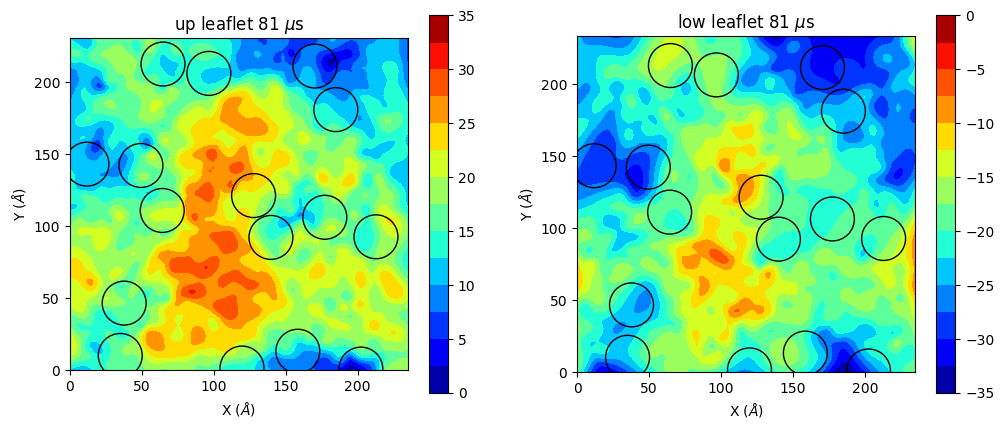

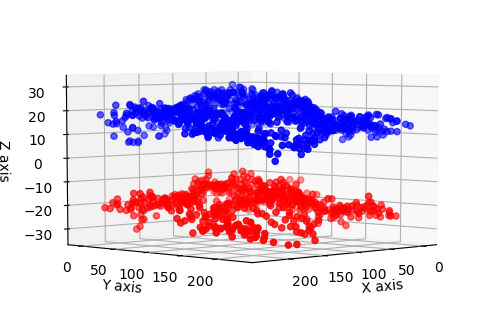

In [19]:
from ipywidgets import FloatSlider
interact(plot_curvature, frame=FloatSlider(min=0, max=10816, step=1352, continuous_update=False));

In [20]:
M2file = 'DAT/M20allxyzf0.dat'
xm2, ym2, zm2 = Read_XYZ(M2file)
M2tmfile = 'DAT/M20TMallxyzf0.dat'
xm2tm, ym2tm, zm2tm = Read_XYZ(M2tmfile)

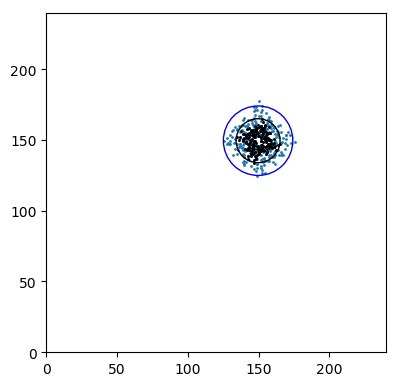

In [21]:
plt.scatter(xm2, ym2, s=1)
plt.scatter(xm2tm, ym2tm, s=1, facecolors='k', edgecolors='k')
plt.scatter(xm2.mean(), ym2.mean(), s=1000, marker='o', facecolors='none', edgecolors='k')
plt.scatter(xm2.mean(), ym2.mean(), s=2500, marker='o', facecolors='none', edgecolors='b')
plt.xlim(0,240)
plt.ylim(0,240)
plt.axes().set_aspect('equal')
figs = plt.gcf()
figs.set_size_inches(figsize_x, figsize_y)
figs.savefig('PNG/M2CD-TM.png', dpi=300)
plt.show()
plt.close()